In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
df = pd.read_csv(r"soil.csv")

In [3]:
df.shape

(2198, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2198 non-null   int64  
 1   P            2198 non-null   int64  
 2   K            2198 non-null   int64  
 3   temperature  2198 non-null   float64
 4   humidity     2198 non-null   float64
 5   ph           2198 non-null   float64
 6   rainfall     2198 non-null   float64
 7   Crop         2198 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.5+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,50.592357,53.393540,48.161056,25.615518,71.459841,6.469600,103.393322
std,36.909445,32.985028,50.669424,5.065824,22.261715,0.774279,54.933864
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.767412,60.248775,5.971452,64.537413
50%,37.000000,51.000000,32.000000,25.598693,80.464995,6.425675,94.772563
75%,84.750000,68.000000,49.000000,28.561966,89.933202,6.923909,124.075856
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop'], dtype='object')

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,Crop
2193,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2194,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2195,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2196,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2197,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
# for null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['N' 'P' 'K' 'temperature' 'humidity' 'ph' 'rainfall']


In [11]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Crop']


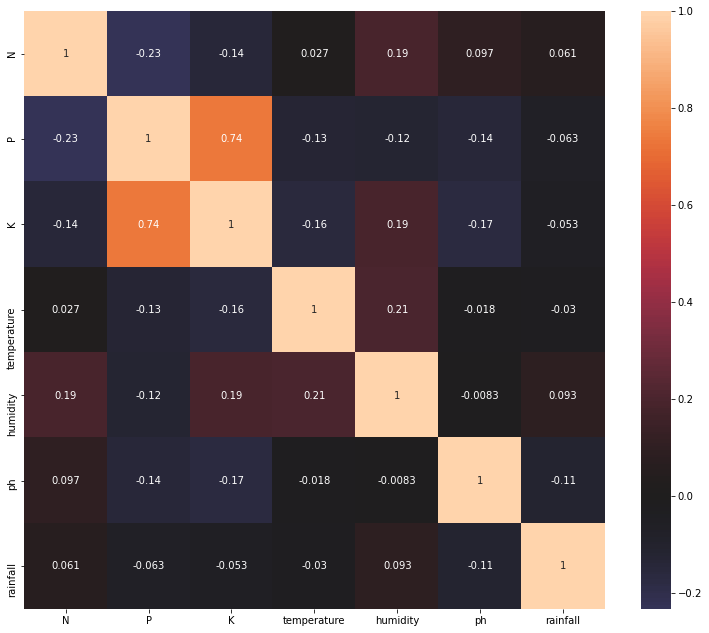

In [12]:
#corelation
plt.figure(figsize = (13,11))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

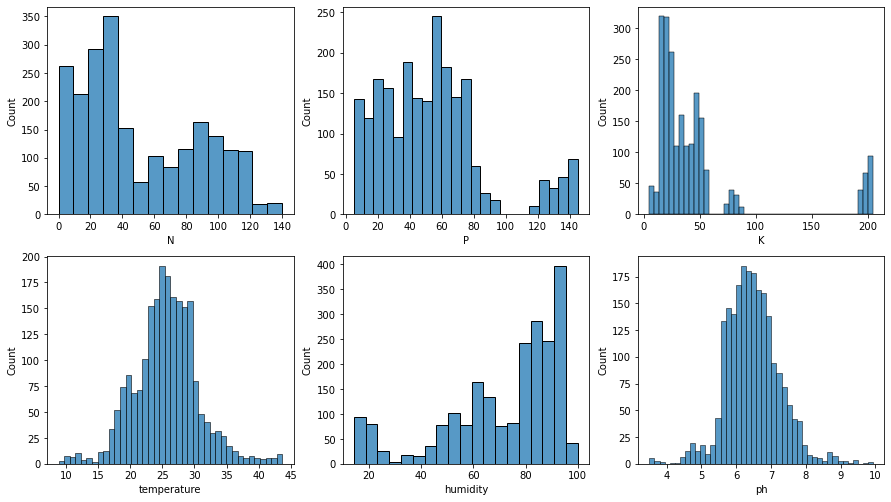

In [13]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

#sns.histplot(df[all_columns[-1]])
#plt.show()

In [14]:
#Pandas df.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
df.loc[(df['ph'] < 3.0), 'Soil_Nature'] = 'Ultra acidic'
df.loc[(df['ph'] >= 3.5) & (df['ph'] <= 4.4), 'Soil_Nature'] = 'Extremely acidic'  
df.loc[(df['ph'] >= 4.5) & (df['ph'] <= 5.0), 'Soil_Nature'] = 'Very strongly acidic' 
df.loc[(df['ph'] >= 5.1) & (df['ph'] <= 5.5), 'Soil_Nature'] = 'Strongly acidic'    
df.loc[(df['ph'] >= 5.6) & (df['ph'] <= 6.0), 'Soil_Nature'] = 'Moderately acidic'  
df.loc[(df['ph'] >= 6.1) & (df['ph'] <= 6.5), 'Soil_Nature'] = 'Slightly acidic'  
df.loc[(df['ph'] >= 6.6) & (df['ph'] <= 7.3), 'Soil_Nature'] = 'Neutral' 
df.loc[(df['ph'] >= 7.4) & (df['ph'] <= 7.8), 'Soil_Nature'] = 'Slightly alkaline'  
df.loc[(df['ph'] >= 7.9) & (df['ph'] <= 8.4), 'Soil_Nature'] = 'Moderately alkaline'
df.loc[(df['ph'] >= 8.5) & (df['ph'] <= 9.0), 'Soil_Nature'] = 'Strongly alkaline'  
df.loc[(df['ph'] > 9.0), 'Soil_Nature']  = 'Very strongly alkaline'

In [15]:
print (df)

        N   P   K  temperature   humidity        ph    rainfall    Crop  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2193  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2194   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2195  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2196  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2197  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

            Soil_Nature  
0                   NaN  
1               Neutral  
2                   N

In [16]:
# for null values.
df.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
Crop             0
Soil_Nature    394
dtype: int64

In [17]:
df.dropna(subset = ["Soil_Nature"], inplace=True)

In [18]:
# for null values.
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Soil_Nature    0
dtype: int64

In [19]:
#Seperating features and target label
features = df[[ 'N', 'P','K','ph']]
target = df['Soil_Nature']

In [20]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [21]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.4,random_state =2)

In [22]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  97.36842105263158
                        precision    recall  f1-score   support

      Extremely acidic       1.00      1.00      1.00         4
     Moderately acidic       1.00      1.00      1.00       145
   Moderately alkaline       1.00      1.00      1.00        16
               Neutral       0.96      0.99      0.98       247
       Slightly acidic       0.99      0.95      0.97       204
     Slightly alkaline       1.00      1.00      1.00        51
       Strongly acidic       1.00      1.00      1.00        21
     Strongly alkaline       0.50      1.00      0.67         7
  Very strongly acidic       1.00      1.00      1.00        20
Very strongly alkaline       0.00      0.00      0.00         7

              accuracy                           0.97       722
             macro avg       0.85      0.89      0.86       722
          weighted avg       0.97      0.97      0.97       722



In [23]:
# Create Base Learners
from sklearn.ensemble import StackingClassifier
estimators = [
     ('NaiveBayes', NaiveBayes)
]

In [24]:
# Initialize Stacking Classifier with the Meta Learner
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
clf = StackingClassifier(
     estimators=estimators, final_estimator=SVC()
)

In [25]:
clf.fit(Xtrain, Ytrain).score(Xtest, Ytest)
predicted_values = clf.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Ensemble')
print("Enssemble model Accuracy is: ", x*100)
print(precision_score(Ytest, predicted_values, average='weighted'))

Enssemble model Accuracy is:  98.75346260387812
0.982713874620122


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

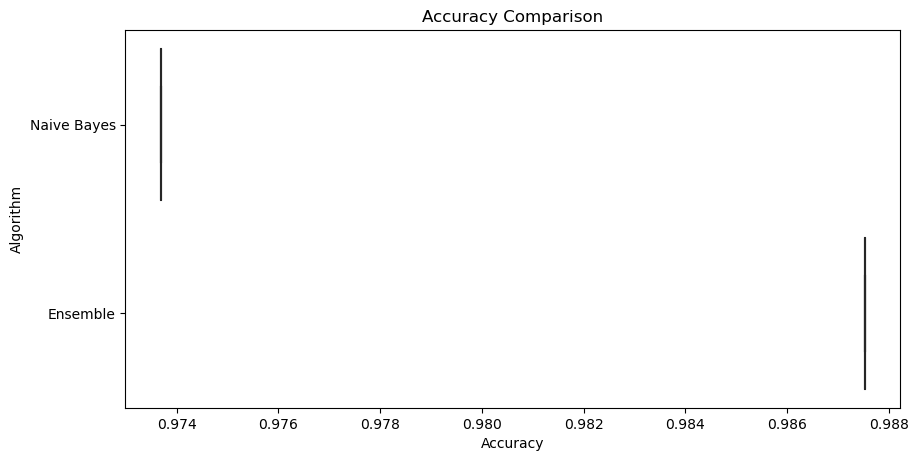

In [26]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
#sns.barplot(x = acc,y = model,palette='dark')
sns.boxplot(x = acc,y = model,palette='dark')

In [27]:
print(classification_report(Ytest,predicted_values))

                        precision    recall  f1-score   support

      Extremely acidic       1.00      1.00      1.00         4
     Moderately acidic       1.00      1.00      1.00       145
   Moderately alkaline       1.00      1.00      1.00        16
               Neutral       1.00      0.99      1.00       247
       Slightly acidic       0.99      1.00      1.00       204
     Slightly alkaline       1.00      1.00      1.00        51
       Strongly acidic       1.00      1.00      1.00        21
     Strongly alkaline       0.50      1.00      0.67         7
  Very strongly acidic       1.00      1.00      1.00        20
Very strongly alkaline       0.00      0.00      0.00         7

              accuracy                           0.99       722
             macro avg       0.85      0.90      0.87       722
          weighted avg       0.98      0.99      0.98       722



In [28]:
data = np.array([[6, 5, 14, 6]])
prediction = clf.predict(data)
print("Soil nature for given soil nutrients is:",prediction)

Soil nature for given soil nutrients is: ['Moderately acidic']


In [29]:
cleanup_nums = {'Soil_Nature':     {'Ultra acidic': 1, 'Extremely acidic': 2,'Very strongly acidic': 3,'Strongly acidic': 4 ,'Moderately acidic': 5,'Slightly acidic': 6, 'Neutral': 7,'Slightly alkaline': 8,'Moderately alkaline': 9, 'Strongly alkaline': 10  ,'Very strongly alkaline': 11}}
df = df.replace(cleanup_nums)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop,Soil_Nature
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,7
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,7
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,7
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,5


In [30]:
#Seperating features and target label
feature = df[['temperature', 'humidity', 'rainfall','Soil_Nature']]
feature_list = list(feature)
t = df['Crop']

In [31]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(feature,t, test_size = 0.2, random_state =None)

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(Xtrain,ytrain)
predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(ytest, predicted_values)
print("RF's Accuracy is: ", x*100)
print(precision_score(ytest, predicted_values, average=None))
print(classification_report(ytest,predicted_values))

RF's Accuracy is:  96.67590027700831
[0.9        1.         0.95833333 1.         1.         1.
 0.92307692 1.         1.         1.         0.91304348 0.94444444
 0.95238095 1.         1.         1.         0.86666667 1.
 1.         0.90909091 0.92857143 1.        ]
              precision    recall  f1-score   support

       apple       0.90      1.00      0.95        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        23
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        16
      coffee       1.00      1.00      1.00        14
      cotton       0.92      1.00      0.96        12
      grapes       1.00      0.95      0.97        19
        jute       1.00      0.95      0.97        19
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.91      1.00      0.95        21
       maize       0.94      1.00      0.97        17
       mango       0.95      

In [33]:
# Making the Confusion Matrix
print(pd.crosstab(ytest, predicted_values, rownames=['Actual Crop'], colnames=['Predicted Crop']))

Predicted Crop  apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
Actual Crop                                                                   
apple              18       0          0         0        0       0       0   
banana              0      18          0         0        0       0       0   
blackgram           0       0         23         0        0       0       0   
chickpea            0       0          0        14        0       0       0   
coconut             0       0          0         0       16       0       0   
coffee              0       0          0         0        0      14       0   
cotton              0       0          0         0        0       0      12   
grapes              0       0          0         0        0       0       1   
jute                0       0          0         0        0       0       0   
kidneybeans         0       0          0         0        0       0       0   
lentil              0       0          0         0  

In [34]:
fert=pd.read_csv(r'Fertilizer Prediction.csv')

In [35]:
fert.shape

(102, 8)

In [36]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N            102 non-null    int64 
 1   K            102 non-null    int64 
 2   P            102 non-null    int64 
 3   temparature  102 non-null    int64 
 4   moisture     102 non-null    int64 
 5   humidity     102 non-null    int64 
 6   Crop         102 non-null    object
 7   Fertilizer   102 non-null    object
dtypes: int64(6), object(2)
memory usage: 6.5+ KB


In [37]:
fert

,N,K,P,temparature,moisture,humidity,Crop,Fertilizer
0,37,0,0,26,38,52,maize,Urea
1,12,0,36,29,45,52,coffee,FYM
2,7,9,30,34,62,65,cotton,14-35-14
3,22,0,20,32,34,62,jute,28-28
4,35,0,0,28,46,54,rice,Urea
...,...,...,...,...,...,...,...,...
97,15,0,41,36,43,60,mango,6N-6P-6K
98,12,0,10,29,57,58,coffee,20-20
99,8,58,17,28,26,63,lentil,32-30-9
100,37,18,39,24,30,94,pomegranate,10N-10P-10K


In [38]:
# for null values
fert.isnull().sum()

N              0
K              0
P              0
temparature    0
moisture       0
humidity       0
Crop           0
Fertilizer     0
dtype: int64

In [39]:
fert["Crop"] = fert["Crop"].astype('category')
fert.dtypes

N                 int64
K                 int64
P                 int64
temparature       int64
moisture          int64
humidity          int64
Crop           category
Fertilizer       object
dtype: object

In [40]:
fert["Crop_cat"] = fert["Crop"].cat.codes
fert.head()
fert.to_csv('Fertilizer Prediction.csv')

In [41]:
#Seperating features and target label
features = fert[['N','K','P','Crop_cat' ]]
target = fert['Fertilizer']

In [42]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.5,random_state =2)

In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import  KNeighborsClassifier
error_rate = []
for i in range(1, 50):
#pipeline consisting of two stages. The first scales the features, and the second trains a classifier on the resulting dataset
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(Xtrain, Ytrain)
    predictions = pipeline.predict(Xtest)
    accuracy = accuracy_score(Ytest, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != Ytest)) 


Accuracy at k = 1 is 0.4117647058823529
Accuracy at k = 2 is 0.5098039215686274
Accuracy at k = 3 is 0.5294117647058824
Accuracy at k = 4 is 0.5098039215686274
Accuracy at k = 5 is 0.6078431372549019
Accuracy at k = 6 is 0.6078431372549019
Accuracy at k = 7 is 0.6078431372549019
Accuracy at k = 8 is 0.6274509803921569
Accuracy at k = 9 is 0.6078431372549019
Accuracy at k = 10 is 0.5490196078431373
Accuracy at k = 11 is 0.5294117647058824
Accuracy at k = 12 is 0.49019607843137253
Accuracy at k = 13 is 0.45098039215686275
Accuracy at k = 14 is 0.47058823529411764
Accuracy at k = 15 is 0.43137254901960786
Accuracy at k = 16 is 0.45098039215686275
Accuracy at k = 17 is 0.5294117647058824
Accuracy at k = 18 is 0.49019607843137253
Accuracy at k = 19 is 0.47058823529411764
Accuracy at k = 20 is 0.45098039215686275
Accuracy at k = 21 is 0.4117647058823529
Accuracy at k = 22 is 0.35294117647058826
Accuracy at k = 23 is 0.3333333333333333
Accuracy at k = 24 is 0.3137254901960784
Accuracy at k = 

Minimum error:- 0.37254901960784315 at K = 8


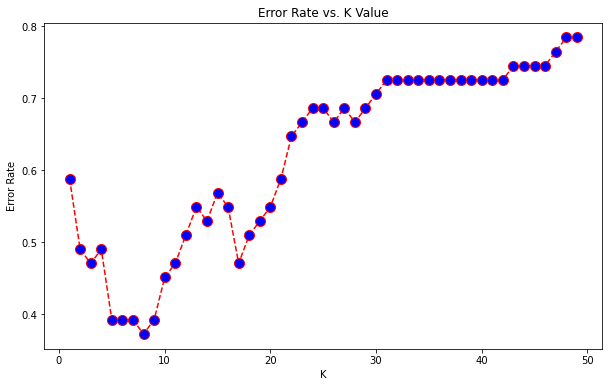

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [45]:
data = np.array([[7,9,30,1]])
prediction = pipeline.predict(data)
print("Recommended Fertilizer for given crop is:",prediction)

Recommended Fertilizer for given crop is: ['Urea']


In [46]:
print(classification_report(Ytest,predictions))

                  precision    recall  f1-score   support

        10-26-26       0.00      0.00      0.00         2
     10N-10P-10K       0.00      0.00      0.00         2
        14-35-14       0.00      0.00      0.00         5
        17-17-17       0.00      0.00      0.00         3
           20-20       0.00      0.00      0.00         3
     20N-10P-10K       0.00      0.00      0.00         1
           28-28       0.00      0.00      0.00         7
        6N-6P-6K       0.00      0.00      0.00         2
       8N-10P-8K       0.00      0.00      0.00         1
    8N-3P-9K-2Mg       0.00      0.00      0.00         2
      Capsularis       0.00      0.00      0.00         1
             DAP       0.00      0.00      0.00         5
             FYM       0.00      0.00      0.00         3
            Urea       0.22      1.00      0.36        11
ammonium nitrate       0.00      0.00      0.00         1
         compost       0.00      0.00      0.00         1
            u